In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

## Predict reaction

In [3]:
import os
import torch
from rxnscribe import RxnScribe
import matplotlib.pyplot as plt

model_path = '../ckpts/pix2seq_reaction_cv_0.ckpt'
image_file = '../assets/acs.joc.5b01703-Scheme-c1.png'
device = torch.device('cpu')
model = RxnScribe(model_path, device)

predictions = model.predict_image_file(image_file, molscribe=True, ocr=True)

Using CPU. Note: This module is much faster with a GPU.


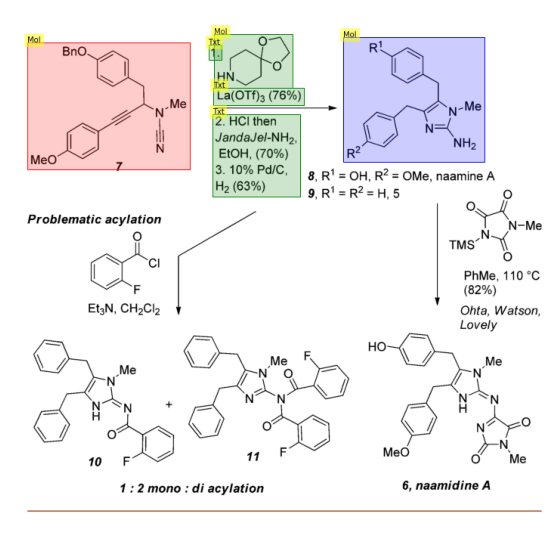

{'reactants': [{'category': '[Mol]', 'bbox': (0.006003001500750375, 0.01789065264339487, 0.3171585792896448, 0.28245545536996136), 'category_id': 1, 'smiles': 'COc1ccc(C#CC(Cc2ccc(OCc3ccccc3)cc2)N(C)C#N)cc1', 'molfile': '\n     RDKit          2D\n\n 22 23  0  0  0  0  0  0  0  0999 V2000\n    4.3092    0.5276    0.0000 R   0  0  0  0  0  0  0  0  0  0  0  0\n    5.5118   -0.1811    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.5118   -1.5984    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    6.7144   -2.3071    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.9170   -1.5984    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.9170   -0.1811    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    6.7144    0.5276    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.1195   -2.3071    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.2198   -3.7244    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    8.0172   -4.4331    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n

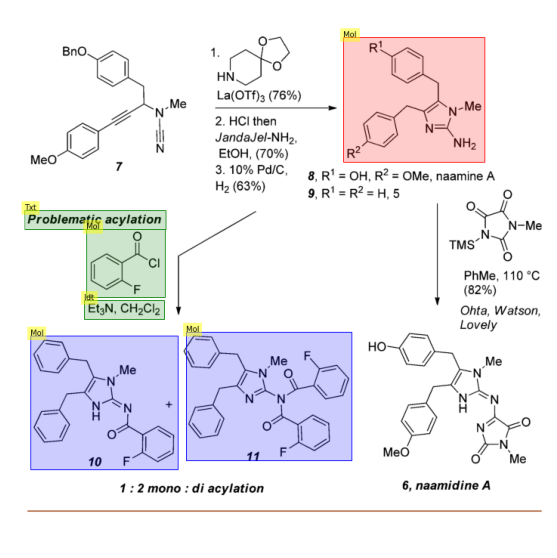

{'reactants': [{'category': '[Mol]', 'bbox': (0.6128064032016008, 0.007047832859519191, 0.8839419709854928, 0.26673336668334163), 'category_id': 1, 'smiles': '[1*]c1ccc(Cc2c(Cc3ccc([2*])cc3)nc(N)n2C)cc1', 'molfile': '\n     RDKit          2D\n\n 23 25  0  0  0  0  0  0  0  0999 V2000\n    8.8298   -4.9843    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   10.1677   -4.5118    0.0000 R   0  0  0  0  0  0  0  0  0  0  0  0\n    8.3839   -6.4016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.1866   -7.5827    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.8676   -6.4016    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.4217   -4.9843    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.0838   -4.5118    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.0136   -5.5354    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.2811   -6.9528    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2108   -7.8976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    

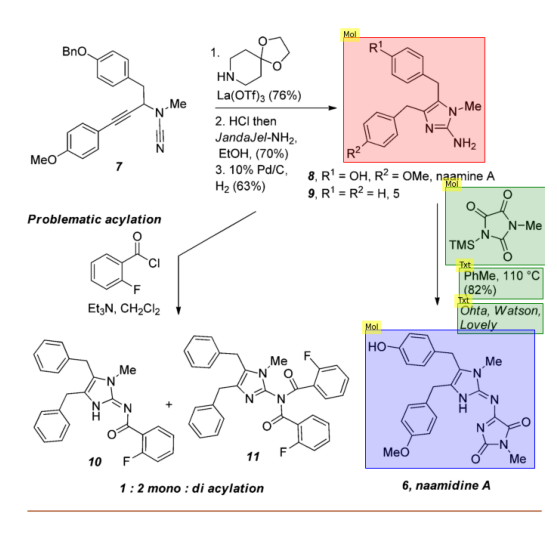

{'reactants': [{'category': '[Mol]', 'bbox': (0.6128064032016008, 0.007047832859519191, 0.8839419709854928, 0.26673336668334163), 'category_id': 1, 'smiles': '[1*]c1ccc(Cc2c(Cc3ccc([2*])cc3)nc(N)n2C)cc1', 'molfile': '\n     RDKit          2D\n\n 23 25  0  0  0  0  0  0  0  0999 V2000\n    8.8298   -4.9843    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   10.1677   -4.5118    0.0000 R   0  0  0  0  0  0  0  0  0  0  0  0\n    8.3839   -6.4016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.1866   -7.5827    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.8676   -6.4016    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.4217   -4.9843    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.0838   -4.5118    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.0136   -5.5354    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.2811   -6.9528    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2108   -7.8976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    

In [4]:
output = model.draw_predictions(predictions, image_file=image_file)
for i, img in enumerate(output):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.imshow(img)
    plt.show()
    print(predictions[i])